# BA 인공지능 과제1 - 20200977 한영태

In [1]:
#라이브러리 import
import pandas as pd
import numpy as np
import statsmodels.api  as  sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# 1. sunspots data

In [2]:
#sunspots data 불러오기
sunspots = sm.datasets.get_rdataset("sunspots").data

In [3]:
#R코드: class(sunspots)
cls=type(sunspots) #python에는 "ts"클래스가 따로 존재하지 않으므로 DF로 대체함
cls

pandas.core.frame.DataFrame

In [4]:
#R코드: tsp(sunspots)
def tsp(df):
    start, end = df.iloc[0,0], df.iloc[-1,0]
    frequency=round(1/(df.iloc[1,0]-df.iloc[0,0]))
    print(start, end, frequency)
    
tsp(sunspots)

1749.0 1983.91666667 12


In [5]:
#R코드: length(sunspots)
len(sunspots)

2820

In [6]:
#R코드: (1983-1749+1)*12
(1983-1749+1)*12

2820

In [7]:
#R코드: attributes(sunspots)
def attributes(df):
    tsp(df)
    print(type(df))

attributes(sunspots)

1749.0 1983.91666667 12
<class 'pandas.core.frame.DataFrame'>


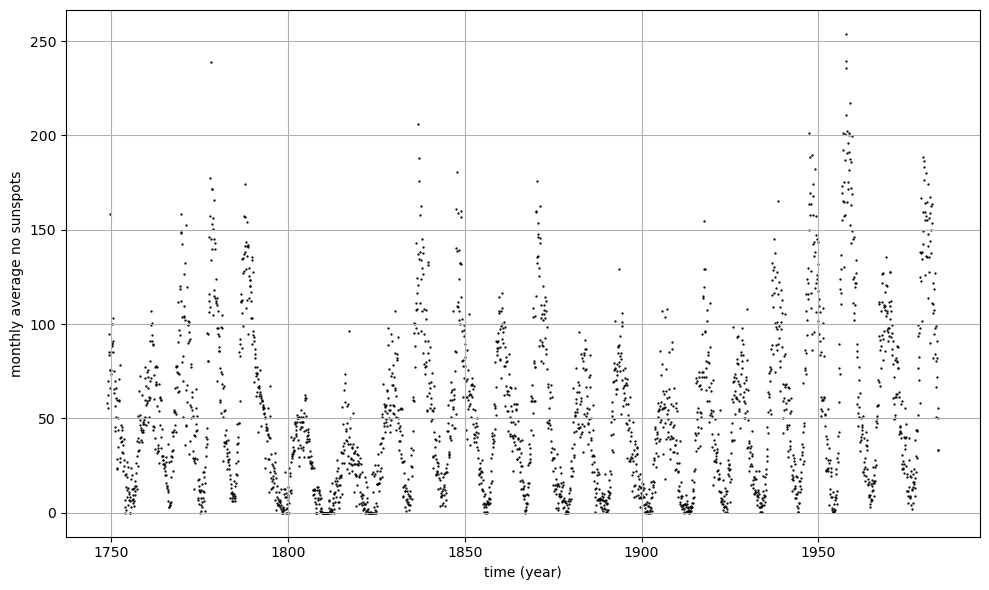

In [8]:
# 산점도1
xt = sunspots['time']
spots = sunspots['value']

plt.figure(figsize=(10, 6))
plt.scatter(xt, spots, s=0.4, color='black')
plt.xlabel('time (year)')
plt.ylabel('monthly average no sunspots')
plt.grid(True)
plt.tight_layout()
plt.show()

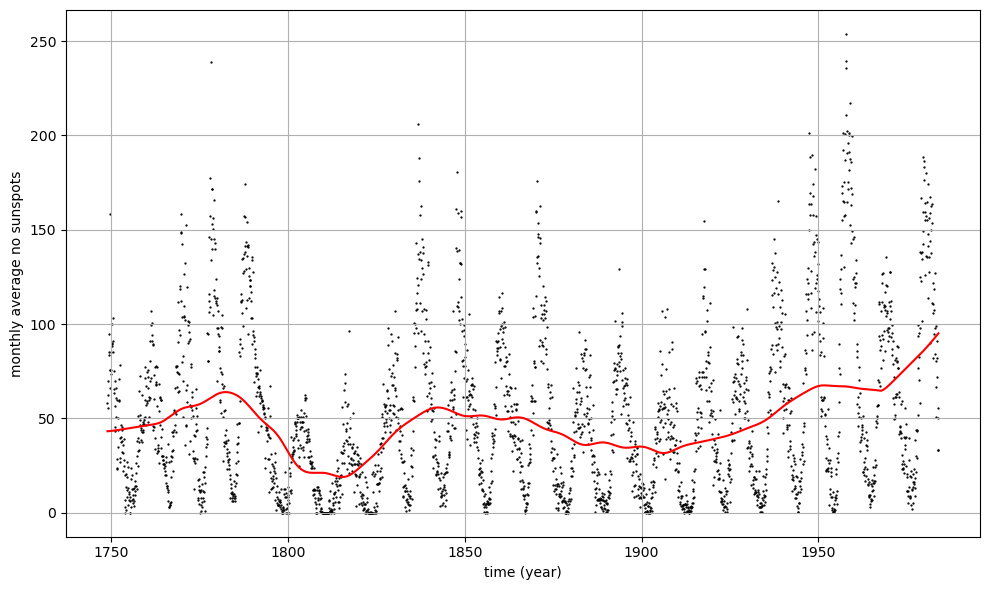

In [9]:
#산점도2

lowess = sm.nonparametric.lowess(spots, xt, frac=0.14) #R코드에서의 span=2와 그나마 모양이 비슷하도록 frac을 설정했습니다
loess_xt, loess_spots = lowess.T

plt.figure(figsize=(10, 6))
plt.scatter(xt, spots, s=0.4, color='black')
plt.plot(loess_xt, loess_spots, color='red')
plt.xlabel('time (year)')
plt.ylabel('monthly average no sunspots')
plt.grid(True)
plt.tight_layout()
plt.show()

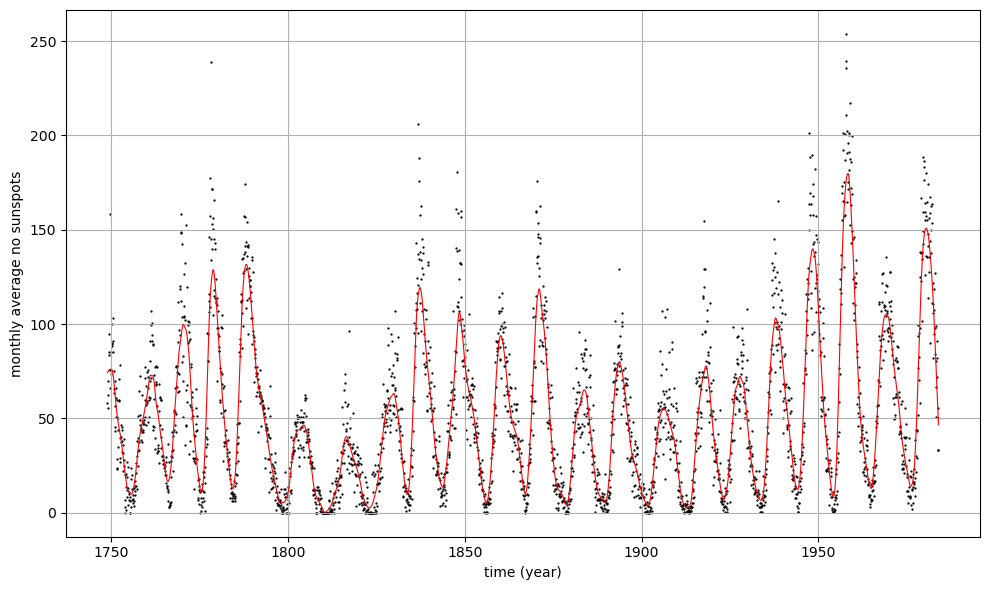

In [10]:
#산점도3

lowess = sm.nonparametric.lowess(spots, xt, frac=36/2820)
loess_xt, loess_spots = lowess.T

plt.figure(figsize=(10, 6))
plt.scatter(xt, spots, s=0.4, color='black')
plt.plot(loess_xt, loess_spots, color='red', linewidth=0.8)
plt.xlabel('time (year)')
plt.ylabel('monthly average no sunspots')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. trees data

In [11]:
#trees data 불러오기
trees = sm.datasets.get_rdataset("trees").data

In [12]:
#R코드: names(trees)<- c('g','h','v')
trees.columns=['g', 'h', 'v']

In [13]:
#R코드: head(trees)
trees.head(6)

,g,h,v
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7


In [14]:
#R코드: tail(trees)
trees.tail(6)

,g,h,v
25,17.3,81,55.4
26,17.5,82,55.7
27,17.9,80,58.3
28,18.0,80,51.5
29,18.0,80,51.0
30,20.6,87,77.0


## Trees pairgrid

NameError: name 'correlation_matrix' is not defined

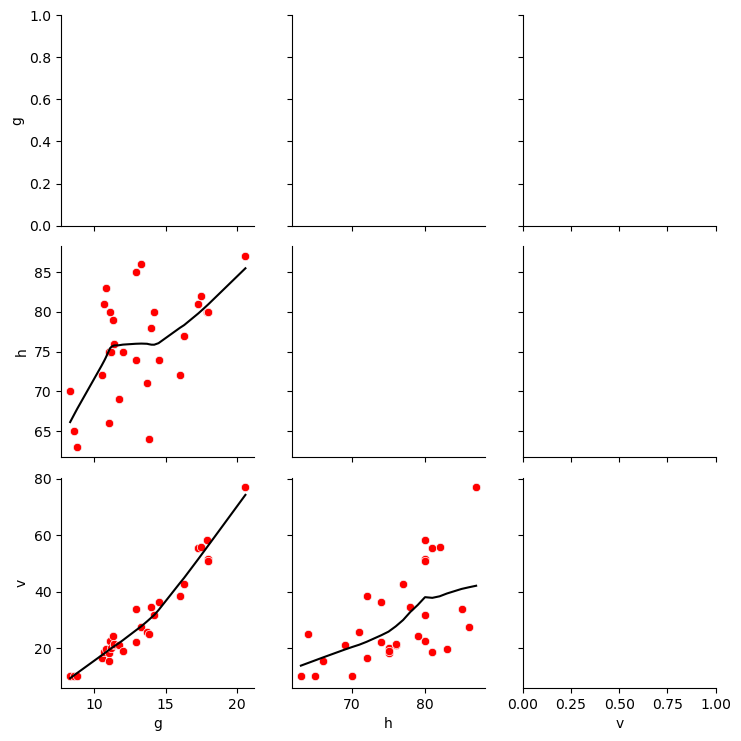

In [15]:
# 예제 데이터 불러오기
iris = trees

# PairGrid 생성
g = sns.PairGrid(iris)

# 하삼각 부분 그래프 (산점도) 추가
g.map_lower(sns.scatterplot)
    
def scatter_with_loess(x, y, **kwargs):
    sns.scatterplot(x=x, y=y, **kwargs)
    lowess = sm.nonparametric.lowess(y, x, frac=.7)
    x_lowess, y_lowess = np.transpose(lowess)
    plt.plot(x_lowess, y_lowess, color='black')

g.map_lower(scatter_with_loess, color="red")

# 상삼각 부분에 상관 계수 넣기
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].text(0.5, 0.5, f"Corr:\n {correlation_matrix.iloc[i, j]:.3f}",
                      ha="center", va="center", transform=g.axes[i, j].transAxes)

# 대각선 부분 그래프 추가 (히스토그램 또는 KDE)
g.map_diag(sns.histplot)
#g.map_diag(sns.kdeplot, color="blue", shade=False)

# 그래프 표시
plt.show()

In [ ]:
# PairGrid 생성
g = sns.PairGrid(trees, diag_sharey=False);
#g = sns.PairGrid(iris)

# 상삼각 부분에 상관 계수 넣기
'''
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].text(0.5, 0.5, f"Corr:\n {correlation_matrix.iloc[i, j]:.3f}",
                      ha="center", va="center", transform=g.axes[i, j].transAxes)
'''

# 대각선 부분 그래프 추가 (히스토그램 또는 KDE)
g.map_diag(sns.kdeplot)
#g.map_diag(sns.histplot)
#g.map_diag(sns.kdeplot, color="blue", shade=False)

# 그래프 표시
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate sample data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y_true = 2 * np.sin(x) + x + np.random.normal(0, 1, 100)

# Fit a nonlinear regression model
X = sm.add_constant(x)
model = sm.OLS(y_true, X)
results = model.fit()

# Predict values for the regression line
y_pred = results.predict(X)

# Calculate confidence intervals
confidence_intervals = results.get_prediction(X).conf_int()

# Plot the data
plt.scatter(x, y_true, label='Actual Data')
plt.plot(x, y_pred, label='Nonlinear Regression Line', color='red')

# Plot confidence intervals
plt.fill_between(x, confidence_intervals[:, 0], confidence_intervals[:, 1], alpha=0.2, color='blue', label='95% Confidence Interval')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Nonlinear Regression with Confidence Intervals')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# Generate sample data with a quadratic relationship
np.random.seed(0)
x = np.linspace(0, 10, 100)
y_true = 2 * x**2 - 3 * x + 1 + np.random.normal(0, 1, 100)

# Fit a nonlinear regression model (quadratic)
X = sm.add_constant(np.column_stack((x, x**2)))
model = sm.OLS(y_true, X)
results = model.fit()

# Predict values for the regression line
y_pred = results.predict(X)

# Calculate confidence intervals
confidence_intervals = results.get_prediction(X).conf_int()

# Create a DataFrame for seaborn pairplot
data = pd.DataFrame({'x': x, 'y_true': y_true, 'y_pred': y_pred})

# Function to plot scatter with LOESS
def scatter_with_loess(x, y, **kwargs):
    sns.scatterplot(x=x, y=y, **kwargs)
    lowess = sm.nonparametric.lowess(y, x, frac=.3)
    x_lowess, y_lowess = np.transpose(lowess)
    plt.plot(x_lowess, y_lowess, color='black')

# PairGrid creation
g = sns.PairGrid(data)

# Scatter plots in the lower triangle
g.map_lower(scatter_with_loess, color='red')

# Add regression line and confidence intervals to the lower part
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    if i != j:
        x_data = data[data.columns[i]]
        y_data = data[data.columns[j]]
        X = sm.add_constant(x_data)
        model = sm.OLS(y_data, X)
        results = model.fit()
        y_pred = results.predict(X)
        confidence_intervals = results.get_prediction(X).conf_int()

        ax = g.axes[i, j]
        ax.plot(x_data, y_pred, color='red', lw=2, label='Nonlinear Regression Line')
        ax.fill_between(x_data, confidence_intervals[:, 0], confidence_intervals[:, 1], alpha=0.2, color='blue', label='95% Confidence Interval')
        ax.legend()

# Correlation coefficients in the upper triangle
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].text(0.5, 0.5, f"Corr:\n {data.corr().iloc[i, j]:.3f}",
                      ha="center", va="center", transform=g.axes[i, j].transAxes)

# Histograms in the diagonal
g.map_diag(sns.histplot)

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# Generate sample data with a quadratic relationship
np.random.seed(0)
x = np.linspace(0, 10, 100)
y_true = 2 * x**2 - 3 * x + 1 + np.random.normal(0, 1, 100)

# Fit a nonlinear regression model (quadratic)
X = sm.add_constant(np.column_stack((x, x**2)))
model = sm.OLS(y_true, X)
results = model.fit()

# Predict values for the regression line
y_pred = results.predict(X)

# Calculate confidence intervals
confidence_intervals = results.get_prediction(X).conf_int()

# Create a DataFrame for seaborn pairplot
data = trees

# Function to plot scatter with LOESS
def scatter_with_loess(x, y, **kwargs):
    sns.scatterplot(x=x, y=y, **kwargs)
    lowess = sm.nonparametric.lowess(y, x, frac=.3)
    x_lowess, y_lowess = np.transpose(lowess)
    plt.plot(x_lowess, y_lowess, color='black')

# PairGrid creation
g = sns.PairGrid(data)

# Scatter plots in the lower triangle
g.map_lower(scatter_with_loess, color='red')

# Add regression line and confidence intervals to the lower part
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    if i != j:
        x_data = data[data.columns[i]]
        y_data = data[data.columns[j]]
        X = sm.add_constant(x_data)
        model = sm.OLS(y_data, X)
        results = model.fit()
        y_pred = results.predict(X)
        confidence_intervals = results.get_prediction(X).conf_int()

        ax = g.axes[i, j]
        ax.plot(x_data, y_pred, color='red', lw=2, label='Nonlinear Regression Line')
        ax.fill_between(x_data, confidence_intervals[:, 0], confidence_intervals[:, 1], alpha=0.2, color='blue', label='95% Confidence Interval')
        ax.legend()

# Correlation coefficients in the upper triangle
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].text(0.5, 0.5, f"Corr:\n {data.corr().iloc[i, j]:.3f}",
                      ha="center", va="center", transform=g.axes[i, j].transAxes)

# Histograms in the diagonal
g.map_diag(sns.histplot)

# Show the plot
plt.show()

In [ ]:
#pip install pyearth --no-deps

In [16]:
import pandas as pd
from pyearth import Earth
from sklearn.preprocessing import OneHotEncoder

# 'trees' 데이터 불러오기 (seaborn 라이브러리에서 로드)
trees = sns.load_dataset('trees')

# 응답 변수 'v'를 y로 설정하고 나머지 변수들을 X로 설정
X = trees.drop('Volume', axis=1)  # 'v'는 여기서 'Volume'으로 가정했습니다.
y = trees['Volume']

# MARS 모델 생성 및 적합
model = Earth(max_degree=2)
model.fit(X, y)

# 계수 출력
print("Coefficients:")
print(model.coef_)

ImportError: cannot import name 'Earth' from 'pyearth' (C:\Users\young0tete\anaconda3\Lib\site-packages\pyearth\__init__.py)